# Notebook_1 - Euler's Method

Numerical solutions and Euler's method

### Import needed packages

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

### Goals

We want to get a numerical solution to the ODE:
$$y' = 2ty$$
with the initial condition
$$y(1)=1$$

We're going to use Euler's method!

## Euler's Method

Euler's method says that the way to solve $y' = f(t,y)$

It is given by two *update equations*.
$$y_{n+1} = y_{n} + \Delta t \cdot f(t_n,y_n)$$
$$t_{n+1} = t_{n} + \Delta t$$

Here, $n$ is the *index* that tracks how many steps we've taken, and $\Delta t$ is the size of the step we take in team with each update. We will start with $y_0$ and $t_0$ given by our initial conditions, and update from there.

By the way, we now can recognize that these so-called "update equations" are a *recursion*. 

In [3]:
# This function takes in where we are "now" (tn,yn) as well as a
# step size h, and then takes a step in the right direction. 
def forward_euler_step(tn,yn,delta_t):
    ynext = yn + delta_t * f(tn,yn)
    tnext = tn + delta_t
    return tnext,ynext

In [4]:
# This function implements the RHS of our differential equation. 
# It will get called *inside* the forward_euler_step function!
def f(t,y):
    return 2*t*y

In [17]:
example_list = [1,3,6,8,8,9]
print(example_list)

[1, 3, 6, 8, 8, 9]


In [24]:
example_list[-2]

8

In [11]:
# Let's start by choosing a step size
delta_t = 0.01

# Let's also decide on a final value for t. 
t_final = 3

# Let's initialize some empty Python lists to store the solution
t_solution = []
y_solution = []

# And let's put in the initial conditions: t=1 and y=1
# by appending them to the end of the lists.
t0 = 1
y0 = 1
t_solution.append(t0)
y_solution.append(y0)

# We'll keep stepping forward until we've reached t_final
while ( t_solution[-1]<t_final ):
    tn = t_solution[-1]
    yn = y_solution[-1]
    t_next,y_next = forward_euler_step(tn,yn,delta_t)
    t_solution.append(t_next)
    y_solution.append(y_next)

For this problem, we actually happen to know the exact solution, which is $$y(t) = e^{t^2-1}$$
We can define this as a function:

In [12]:
def true_solution(t):
    # e^(t^2-1), the true solution
    return np.exp(np.array(t)**2-1)

And we can get the true solution's `y` values for each of the `t` values that are in our numerical solution. 

In [13]:
y_true = true_solution(t_solution)

### Plot

Text(0.5, 1.0, 'numerical solution example')

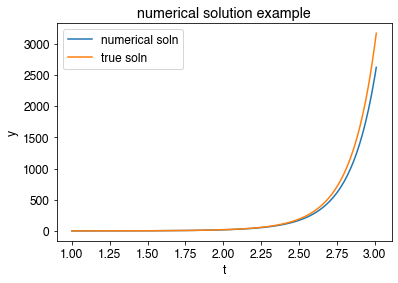

In [14]:
# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
# Plot the numerical solution
ax.plot(t_solution,y_solution,label='numerical soln')
# Plot the true solution
ax.plot(t_solution,y_true,label='true soln')

# Make the plot attractive
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend(loc='best')
ax.set_title('numerical solution example')

# Bonus

As we make the step size smaller and smaller, we'll typically get a better and better answer.  Notice how above, there's quite the gap between the numerical solution and the true solution? 

Try repeating the code above, but *drop the $\Delta t$ to 0.01*.  What do you observe?